In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import qiskit_aer

measures =[]

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[4])
measures.append(circuit.measure(qreg_q[3], creg_c[0]))
# circuit.draw('mpl')
# circuit.draw('latex', scale=0.5)
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[4])
measures.append(circuit.measure(qreg_q[4], creg_c[1]))
print(circuit.draw('text'))
backend = qiskit_aer.Aer.get_backend('qasm_simulator')
# Aer.get_backend('aer_simulator')

shots = 1024
counts = backend.run(circuit,shots=shots).result().get_counts()

probs = {string:count/shots for string,count in counts.items()}
print(probs)
# print(measures)
# print(circuit)
# circuit.draw('latex', scale=0.5)
# @columns [0,1,2,3,4,5,6,7,8]


     ┌───┐                                    
q_0: ┤ X ├──■──────────────■────■─────────────
     └───┘  │              │    │             
q_1: ───────┼────■─────────■────┼───────■─────
            │    │         │    │       │     
q_2: ───────┼────┼────■────┼────■───────■─────
          ┌─┴─┐┌─┴─┐┌─┴─┐  │    │  ┌─┐  │     
q_3: ─────┤ X ├┤ X ├┤ X ├──┼────┼──┤M├──┼─────
          └───┘└───┘└───┘┌─┴─┐┌─┴─┐└╥┘┌─┴─┐┌─┐
q_4: ────────────────────┤ X ├┤ X ├─╫─┤ X ├┤M├
                         └───┘└───┘ ║ └───┘└╥┘
c: 2/═══════════════════════════════╩═══════╩═
                                    0       1 
{'01': 1.0}


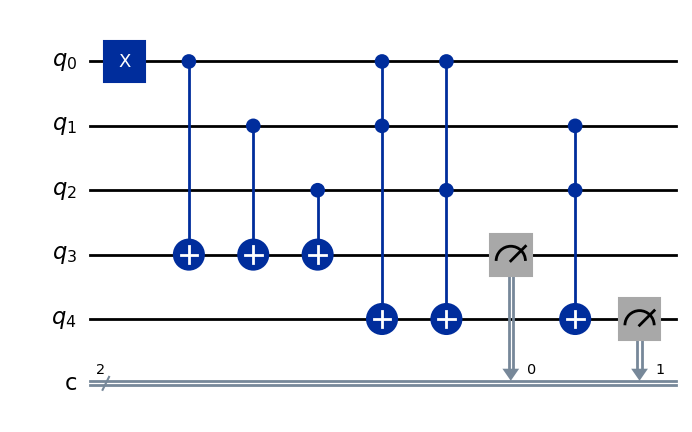

In [10]:
circuit.draw('mpl')

# Hadamard Gate

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import qiskit_aer
from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
print(circuit.draw('text'))
# @columns [0,1]


backend = qiskit_aer.Aer.get_backend('qasm_simulator')
# Aer.get_backend('aer_simulator')

shots = 1024
counts = backend.run(circuit,shots=shots).result().get_counts()

probs = {string:count/shots for string,count in counts.items()}
print(probs)


     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 2/══════╩═
           0 
{'00': 0.4951171875, '01': 0.5048828125}


In [15]:
import qiskit_aer
def calculProba(circuit, shots=1024):
    backend = qiskit_aer.Aer.get_backend('qasm_simulator')
    counts = backend.run(circuit,shots=shots).result().get_counts()
    return {string:count/shots for string,count in counts.items()}

In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
# @columns [0,0,1,2,3]
print(circuit.draw('text'))


print(calculProba(circuit))

     ┌───┐┌─┐        
q_0: ┤ H ├┤M├────────
     ├───┤└╥┘┌───┐┌─┐
q_1: ┤ X ├─╫─┤ H ├┤M├
     └───┘ ║ └───┘└╥┘
c: 4/══════╩═══════╩═
           0       1 
{'0010': 0.2548828125, '0011': 0.2490234375, '0001': 0.2587890625, '0000': 0.2373046875}


Ce n'est pas possible de savoir dans quel état était le qubit avant. 

In [19]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
# @columns [1,2,3]
print(circuit.draw('text'))

print(calculProba(circuit))

     ┌───┐┌───┐┌─┐
  q: ┤ H ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 
{'0': 1.0}


In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
# @columns [0,1,2,3]
print(circuit.draw('text'))

print(calculProba(circuit))

     ┌───┐┌───┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤ H ├┤M├
     └───┘└───┘└───┘└╥┘
c: 1/════════════════╩═
                     0 
{'1': 1.0}


H est totalement déterministe quand on l'applique 2 fois. Le qubit revient dans son état intial. 